In [1]:
import pandas as pd
import numpy as np

In [2]:
df_music = pd.read_csv("music_accurate.csv")
df_music.head()

,track_id,duration,loudness,tempo,artist_hotness,key_confidence,mode_confidence,artist_id
0,b'TRAAAAW128F429D538',218.93179,-11.197,92.198,0.401998,0.736,0.636,b'ARD7TVE1187B99BFB1'
1,b'TRAAABD128F429CF47',148.03546,-9.843,121.274,0.417500,0.169,0.430,b'ARMJAGH1187FB546F3'
2,b'TRAAADZ128F9348C2E',177.47546,-9.689,100.070,0.343428,0.643,0.565,b'ARKRRTF1187B9984DA'
3,b'TRAAAEF128F4273421',233.40363,-9.013,119.293,0.454231,0.751,0.749,b'AR7G5I41187FB4CE6C'
4,b'TRAAAFD128F92F423A',209.60608,-4.501,129.738,0.401724,0.092,0.371,b'ARXR32B1187FB57099'


In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_music_encode = df_music.copy()
df_music_encode['track_id'] = le.fit_transform(df_music_encode['track_id'])
df_music_encode['artist_id'] = le.fit_transform(df_music_encode['artist_id'])
df_music_encode.head()

,track_id,duration,loudness,tempo,artist_hotness,key_confidence,mode_confidence,artist_id
0,0,218.93179,-11.197,92.198,0.401998,0.736,0.636,1268
1,1,148.03546,-9.843,121.274,0.417500,0.169,0.430,2353
2,2,177.47546,-9.689,100.070,0.343428,0.643,0.565,2167
3,3,233.40363,-9.013,119.293,0.454231,0.751,0.749,714
4,4,209.60608,-4.501,129.738,0.401724,0.092,0.371,3608


In [14]:
df_music_encode.iloc[:,1:7].head()

,duration,loudness,tempo,artist_hotness,key_confidence,mode_confidence
0,218.93179,-11.197,92.198,0.401998,0.736,0.636
1,148.03546,-9.843,121.274,0.417500,0.169,0.430
2,177.47546,-9.689,100.070,0.343428,0.643,0.565
3,233.40363,-9.013,119.293,0.454231,0.751,0.749
4,209.60608,-4.501,129.738,0.401724,0.092,0.371


In [24]:
n_samples=len(df_music_encode.index)
np.sqrt(n_samples/2)

70.71067811865476

(1, 79.95)

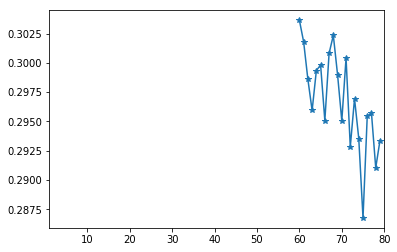

In [25]:
from sklearn.cluster import KMeans
from sklearn import metrics
import sklearn.cluster as skc
import matplotlib.pyplot as plt
import seaborn as sns

ans = []
for k in range(60, 80):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(df_music_encode.iloc[:,1:7])
    ans.append(metrics.silhouette_score(df_music_encode.iloc[:,1:7],kmeans.labels_))
fig,ax = plt.subplots()
plt.plot(range(60,80), ans, '*-')
plt.xlim(1, plt.xlim()[1])

In [32]:
kmeans = KMeans(init='k-means++', n_clusters=74)

In [33]:
#train the kmeans model
kmeans.fit(df_music_encode.iloc[:,1:7])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=74, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
result = kmeans.predict(df_music_encode.iloc[:,1:7])

In [35]:
df_music_encode['predict']=result
df_music_encode.head()

,track_id,duration,loudness,tempo,artist_hotness,key_confidence,mode_confidence,artist_id,predict
0,0,218.93179,-11.197,92.198,0.401998,0.736,0.636,1268,12
1,1,148.03546,-9.843,121.274,0.417500,0.169,0.430,2353,49
2,2,177.47546,-9.689,100.070,0.343428,0.643,0.565,2167,71
3,3,233.40363,-9.013,119.293,0.454231,0.751,0.749,714,54
4,4,209.60608,-4.501,129.738,0.401724,0.092,0.371,3608,31


In [36]:
#reduced model
import sklearn.manifold as skm
import sklearn.decomposition as skd
import sklearn.preprocessing as skp
# df_music_reduced = skd.PCA(n_components=2).fit_transform(df_music_encode.iloc[:,1:7])
df_music_norm = df_music_encode.copy()
df_music_norm.iloc[:,1:7] = skp.scale(df_music_norm.iloc[:,1:7].astype(np.float))

In [22]:
pca_model = skd.PCA().fit(df_music_norm)
norm1 = pca_model.transform(df_music_norm)
norm2 = pca_model.transform(df_music_norm)

In [37]:
kmeans = KMeans(init='k-means++', n_clusters=74)
kmeans.fit(norm1)
result_red = kmeans.predict(norm2)
df_music_red = pd.DataFrame(data=norm2[:, [0,1]], columns=['dimension_1', 'dimension_2'])
df_music_red['predict_reduced']=result_red
df_music_red.head()

,dimension_1,dimension_2,predict_reduced
0,4999.300586,-639.776430,41
1,4998.640149,445.210975,29
2,4997.579761,259.219853,29
3,4996.132739,-1193.785076,7
4,4996.023499,1700.224529,55


In [41]:
cluster=df_music_encode[['track_id','predict']]
cluster.to_csv('cluster_predict.csv', sep=',',index=False)

In [3]:
kmeans = KMeans(init='k-means++', n_clusters=74)

NameError: name 'KMeans' is not defined

In [ ]:
#train the kmeans model
kmeans.fit(df_music_encode.iloc[:,1:7])

In [ ]:
result = kmeans.predict(df_music_encode.iloc[:,1:7])

In [ ]:
df_music_encode['predict']=result
df_music_encode.head()

In [ ]:
cluster=df_music_encode[['track_id','predict']]
cluster.to_csv('cluster_predict_noid.csv', sep=',',index=False)